# 3. Script for conducting sentiment analysis on comment corpora

## Set Up

In [36]:
import pandas as pd

In [37]:
pd.set_option('display.max_colwidth', None)

In [38]:
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

# Import comment data
reddit = pd.read_csv(path+'comments_reddit_all.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'})
fb = pd.read_csv(path+'comments_fb_all.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'})
fb = fb[['comment_id', 'text']]

In [39]:
display(reddit.head())
display(reddit.shape)
display(fb.head())
display(fb.shape)

,comment_id,text
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!
2,gww68ne,phase 2 lai liao wah shag
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit"
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;


(9692, 2)

,comment_id,text
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens."
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.


(6811, 2)

## Preprocessing text

### Clean text

In [45]:
# Function for cleaning text
def clean_text_sa(text):
    import re
    import html
    text1 = html.unescape(text) # remove HTML encoded characters
    text2 = re.sub(r'â€™', '\'', text1) # replce â€™ with apostrophe
    text3 = re.sub(r'\n', ' ', text2) # replace line breaks with spaces
    text4 = re.sub(r'#\S+', '', text3) # remove hashtags
    text5 = re.sub(r'http\S+', '', text4) # remove links starting with http
    text6 = re.sub(r'\S+\.com\S+', '', text5) # remove links not starting with http
    return(text6)

In [46]:
# Apply function to DataFrames
reddit['text_clean_sa'] = reddit.text.apply(clean_text_sa)
fb['text_clean_sa'] = fb.text.apply(clean_text_sa)

### Replacing words/phrases according using self-built dictionary

In [ ]:
# Import dictionary
dict_clean_df = pd.read_csv(path+'dict.csv', keep_default_na=False)
dict_clean = dict(dict_clean_df.values)

In [ ]:
dict_clean

In [ ]:
# Function for replacing text using dictionary mapping
def replace_text(text):
    import re
    for orig, new in dict_clean.items():
        text = re.sub(r'\b{}(\b|^A-Za-z0-9)'.format(orig.strip()), new, text)
    return(text)

In [ ]:
# Apply function to FB and Reddit DataFrames
reddit['text_replaced'] = reddit.text_clean_sa.apply(replace_text)
fb['text_replaced'] = fb.text_clean_sa.apply(replace_text)

In [ ]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

In [69]:
# Export cleaned text corpora to CSV
reddit.to_csv(path+'comments_reddit_all_clean.csv', header=True, index=True, encoding='utf-8-sig')
fb.to_csv(path+'comments_fb_all_clean.csv', header=True, index=True, encoding='utf-8-sig')

## Sentiment analysis 

### VADER

In [70]:
# Define function for scoring sentiment using VADER
def score_vader(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    score = scores['compound']
    return(score) 

In [71]:
# Apply function to DataFrames
reddit['score_vader'] = reddit.text_replaced.apply(score_vader)
fb['score_vader'] = fb.text_replaced.apply(score_vader)

In [72]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772


,comment_id,text,text_clean_sa,text_replaced,score_vader
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319


### TextBlob

In [73]:
# Define function for scoring sentiment using TextBlob
def score_tb(text):
    from textblob import TextBlob
    score = TextBlob(text).sentiment.polarity
    return(score)

In [74]:
# Apply function to DataFrames
reddit['score_tb'] = reddit.text_replaced.apply(score_tb)
fb['score_tb'] = fb.text_replaced.apply(score_tb)

In [75]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000


,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,The opening up in early April was way too much/fast. 75% back to office is practically allowing for all to go back. When the borders were wide open to practically all. Too hasty.,0.0000,0.000000
1,10157877561317115,"Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.","Please ban India flights, India citizens India passport holders India born anyone with a travel history to India. Once you have this ban we will be like before zero community case. Other countries have imposed total ban on India flights and citizens including jail and fine. We should follow in order to protect our citizens.",-0.7044,0.047917
2,10157877564117115,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Haiz.. no apologies for importing cases. All your doing leh garmen. I'm going to have a friendly chat with my MP!,Sigh.. no apologies for importing cases. All your doing leh government. I'm going to have a friendly chat with my Minister of Parliament!,0.3382,0.468750
3,10157877557412115,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,Tighten local measures but fail to shut borders completely on travelers from high-risk countries. What's the point then? What a shame!,-0.8805,-0.125000
4,10157877555032115,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,Blaming us for not following safe distancing measures again instead of blaming themselves.,-0.8319,0.250000


In [76]:
# Export text corpora with scores to CSV
reddit.to_csv(path+'comments_reddit_all_score.csv', header=True, index=True, encoding='utf-8-sig')
fb.to_csv(path+'comments_fb_all_score.csv', header=True, index=True, encoding='utf-8-sig')

## Evaluating sentiment analysis algorithms

### Generating word clouds

To evaluate how well the algorithms have done in analysing the sentiment of each comment, I will first generate word clouds for each algorithm and each polarity to see if the algorithms have indeed succeeded in detecting positive and negative sentiment accurately.

In [77]:
# Import text corpora with scores
import pandas as pd

path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

reddit = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

In [78]:
# Concatenate Reddit and FB score data into one DataFrame 
all_score = pd.concat([reddit, fb], ignore_index=True)
display(all_score.head())
display(all_score.tail())
display(all_score.shape)

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000


,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
15965,10158807617032934,Top fan\nTimothy Tan,Top fan Timothy Tan,Top fan Timothy Tan,0.4767,0.5
15966,10158807627202934,👀👀👀,👀👀👀,👀👀👀,0.0000,0.0
15967,10158807627087934,🙄🙄🙄🙄🙄,🙄🙄🙄🙄🙄,🙄🙄🙄🙄🙄,0.0000,0.0
15968,10158807433227934,Hmm… THOT AH ONG SAID WE BEGINNING TO SEE LIGHT AT THE END OF THE TUNNEL,Hmm… THOT AH ONG SAID WE BEGINNING TO SEE LIGHT AT THE END OF THE TUNNEL,Hmm… THOT AH ONG SAID WE BEGINNING TO SEE LIGHT AT THE END OF THE TUNNEL,0.0000,0.4
15969,10158806329392934,"Eh, i thought GKY said the numbers are stable and healthcare can manage?","Eh, i thought GKY said the numbers are stable and healthcare can manage?","Eh, i thought GKY said the numbers are stable and healthcare can manage?",0.2960,0.0


(15970, 6)

To generate the word cloud, I will need to preprocess the text by removing digits, punctuation and stop words in order to get the most meaningful and frequently used words associated with each polarity. I will also remove domain-specific phrases and proper nouns.

In [79]:
# Function for cleaning text
def clean_text_wc(text):
    import re
    text_clean = re.sub(r'[^A-Za-z\'\"]+', ' ', text).strip().lower() 
    return(text_clean)

In [80]:
# Function for removing stop words
def remove_sw(text):
    from nltk.corpus import stopwords
    sw = set(stopwords.words('English'))
    text_filtered = [word for word in text.split() if not word in sw] 
    text_filtered = ' '.join(text_filtered) 
    return(text_filtered)

In [81]:
# Domain-specific phrases/proper nouns to remove
domain = ['ministry of health', 'intensive care unit', 'multi-ministry task force', 
         'ong ye kung', 'lawrence wong', 'home-based learning', 'work from home', 'ministry of education',
         'chinese new year', 'tan tock seng hospital', 'stay home notice', 'vaccinated travel lane',
         'people\'s action party', 'vaccine', 'vaccination', 'vaccinated', 'unvaccinated', 'people against vaccination',
         'comprehensive economic cooperation agreement', 'government', 'chan chun sing', 'ministry of manpower', 'national day parade',
         'immigrations and checkpoints authority', 'polymerase chain reaction test', 'lee hsien loong', 'safe management measures',
         'safe distancing ambassador', 'healthcare', 'healthcare worker', 'covid', 'coronavirus', 'virus', 'hospital', 'singapore',
         'circuit breaker', 'lockdowns', 'lockdown', 'phase', 'roadmap', 'case', 'cases', 'ministry', 'karaoke', 'local']

In [82]:
# Function for removing domain-specific phrases 
def remove_domain(text):
    import re
    for phrase in domain:
        text = re.sub(r'\b{}(\b|^A-Za-z0-9)'.format(phrase), ' ', text).strip()
    return(text)

In [83]:
# Apply functions to DataFrame
all_score['text_clean_wc'] = all_score.text_replaced.apply(clean_text_wc)
all_score['text_filtered'] = all_score.text_clean_wc.apply(remove_sw)
all_score['text_filtered'] = all_score.text_filtered.apply(remove_domain)

In [84]:
# Inspect DataFrame
all_score.head()

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb,text_clean_wc,text_filtered
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,all my plans are gone no,plans gone
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333,this means people will no longer be allowed to digitally check in by scanning a venue's safeentry qr code with their phone camera or the singpass app from may scanning of barcodes on personal identification cards to check in to venues will still be allowed until may important to take note,means people longer allowed digitally check scanning venue's safeentry qr code phone camera singpass app may scanning barcodes personal identification cards check venues still allowed may important take note
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000,phase lai liao wah tired,lai liao wah tired
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444,government fucks up and takes it out on the population again no changes for workplaces obviously but everyone else gets fucked everyone who said during raya last year lock down this year to celebrate next year was a fucking liar fuck this shit,fucks takes population changes workplaces obviously everyone else gets fucked everyone said raya last year lock year celebrate next year fucking liar fuck shit
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000,gyms also closed till th pepehands i just want to rock climb,gyms also closed till th pepehands want rock climb


I will now generate the word clouds using the preprocessed text.

In [85]:
# Function to generate word cloud
def wordcloud(algo='vader', polarity='pos'):
    all_algo = all_score[['comment_id', 'text_filtered', 'score_{}'.format(algo)]]
    
    if polarity == 'pos':
        all_algo_polarity = all_algo[all_algo['score_{}'.format(algo)]>0]
    elif polarity == 'neg':
        all_algo_polarity = all_algo[all_algo['score_{}'.format(algo)]<0]
    else:
        None
    
    cloud_string = ' '.join(all_algo_polarity['text_filtered']) 
    
    from wordcloud import WordCloud
    cloud = WordCloud().generate(cloud_string)
    return(cloud)

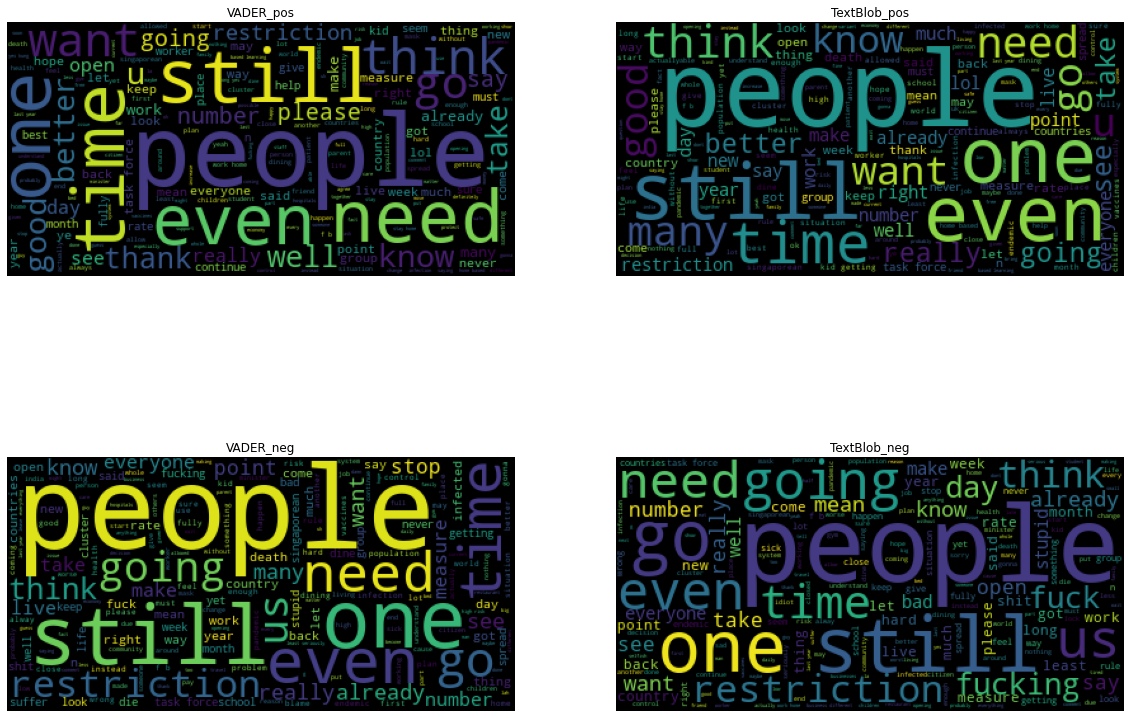

In [86]:
# Generate word clouds into one figure and exporting as PNG
from matplotlib import pyplot as plt

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20, 16))
plt.subplots_adjust(hspace=0)

row = 0 
col = 0 
cloud_list = [wordcloud('vader', 'pos'), wordcloud('vader', 'neg'), wordcloud('tb', 'pos'), wordcloud('tb', 'neg')]
labels_list = ['VADER_pos', 'VADER_neg', 'TextBlob_pos', 'TextBlob_neg']

for i in range(0,4):
    cloud = cloud_list[i]
    ax[row][col].imshow(cloud)
    ax[row][col].axis('off')
    ax[row][col].title.set_text(labels_list[i])
    row = row+1
    if row == rows:
        row = 0
        col = col+1

plt.savefig(f'../data/wordcloud_all.png', bbox_inches='tight')
plt.show() 

From the above, we can see that there are a lot of common words that are repeated across the word clouds and do not bear any sentiment. To produce more meaningful word clouds, I will remove non-sentiment bearing tokens among the top 300 tokens.

In [87]:
# Import top 1000 tokens in corpora
tokens_all_top1000 = pd.read_csv(path+'comments_all_tokens_top1000.csv', index_col=0)

In [88]:
# Inspect top 300 tokens
tokens_all_top300 = tokens_all_top1000['token'][0:300].tolist()
print(tokens_all_top300)

['people', 'covid', 'like', 'still', 'cases', 'vaccinated', 'get', 'go', 'one', 'even', 'time', 'also', 'singapore', 'need', 'us', 'back', 'think', 'going', 'open', 'government', 'would', 'vaccination', 'see', 'many', 'know', 'take', 'well', 'want', 'restrictions', 'virus', 'really', 'good', 'home', 'already', 'said', 'year', 'everyone', 'say', 'measures', 'make', 'u', 'work', 'much', 'country', 'better', 'got', 'new', 'day', 'close', 'cb', 'let', 'point', 'last', 'keep', 'vaccine', 'right', 'lockdown', 'come', 'countries', 'risk', 'way', 'please', 'never', 'stay', 'may', 'since', 'end', 'ktv', 'safe', 'long', 'govt', 'can', 'not', 'next', 'high', 'n', 'dine', 'case', 'fully', 'stop', 'endemic', 'first', 'phase', 'world', 'yet', 'spread', 'b', 'sg', 'care', 'situation', 'weeks', 'sure', 'rate', 'population', 'life', 'must', 'school', 'getting', 'live', 'hope', 'group', 'health', 'lol', 'f', 'another', 'icu', 'numbers', 'na', 'give', 'look', 'every', 'public', 'done', 'two', 'workers', 

Among the top 300 tokens, we can see that apart from some sentiment-bearing tokens (e.g. 'good', 'better', 'sure') the rest are not as meaningful and so can be removed. I will create a list of tokens to keep among these tokens and remove the remaining as stop words.

In [89]:
tokens_keep = ['good', 'better', 'new', 'safe', 'hope', 'infected', 'enough', 
               'fucking', 'die', 'bad', 'hard', 'thanks', 'help', 
               'best', 'fuck', 'shit', 'big', 'thank', 'normal',
               'stupid', 'wrong', 'problem', 'blame', 'suffer']

tokens_sw_top = [t for t in tokens_all_top300 if t not in tokens_keep]

In [90]:
# Function for removing top occuring tokens
def remove_sw_top(text):
    text_filtered = [word for word in text.split() if not word in tokens_sw_top] 
    text_filtered = ' '.join(text_filtered) 
    return(text_filtered)

In [91]:
# Apply functions to DataFrame
all_score['text_filtered'] = all_score.text_filtered.apply(remove_sw_top)
display(all_score.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb,text_clean_wc,text_filtered
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,all my plans are gone no,plans gone
1,gww5jfz,&gt; This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31.\n\nImportant to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,> This means people will no longer be allowed to digitally check in by scanning a venue's SafeEntry QR code with their phone camera or the Singpass app from May 17. Scanning of barcodes on personal identification cards to check in to venues will still be allowed until May 31. Important to take note!!,-0.2462,0.208333,this means people will no longer be allowed to digitally check in by scanning a venue's safeentry qr code with their phone camera or the singpass app from may scanning of barcodes on personal identification cards to check in to venues will still be allowed until may important to take note,longer digitally check scanning venue's safeentry qr code phone camera singpass app scanning barcodes personal identification cards check venues important note
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000,phase lai liao wah tired,lai liao wah tired
3,gww6icr,"Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. \n\nEveryone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. \n\nFuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit","Government fucks up and takes it out on the population again. No changes for workplaces obviously, but everyone else gets fucked. Everyone who said during raya last year “lock down this year to celebrate next year” was a fucking liar. Fuck this shit",-0.9668,-0.244444,government fucks up and takes it out on the population again no changes for workplaces obviously but everyone else gets fucked everyone who said during raya last year lock down this year to celebrate next year was a fucking liar fuck this shit,fucks takes changes workplaces obviously gets fucked lock celebrate fucking liar fuck shit
4,gww6luf,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,Gyms also closed till 30th. PepeHands. I just want to rock climb ;_;,0.0772,-0.100000,gyms also closed till th pepehands i just want to rock climb,gyms th pepehands rock climb


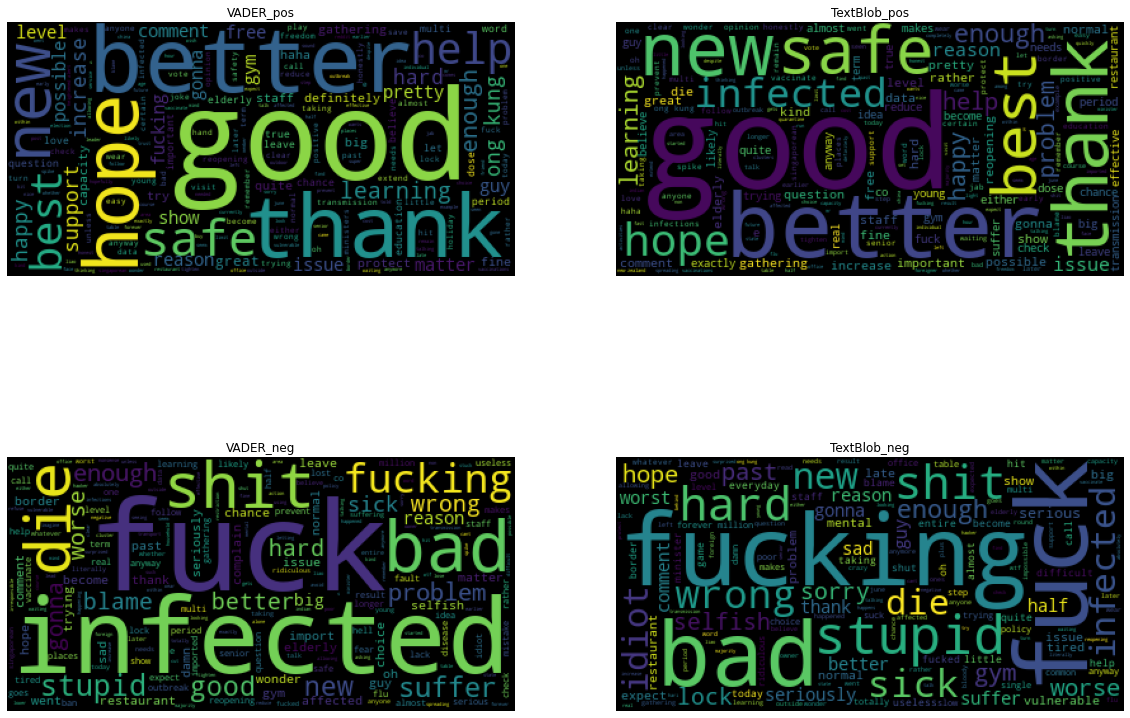

In [92]:
# Generating new word clouds and exporting as PNG
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20, 16))
plt.subplots_adjust(hspace=0)

row = 0 
col = 0 
cloud_list = [wordcloud('vader', 'pos'), wordcloud('vader', 'neg'), wordcloud('tb', 'pos'), wordcloud('tb', 'neg')]
labels_list = ['VADER_pos', 'VADER_neg', 'TextBlob_pos', 'TextBlob_neg']

for i in range(0,4):
    cloud = cloud_list[i]
    ax[row][col].imshow(cloud)
    ax[row][col].axis('off')
    ax[row][col].title.set_text(labels_list[i])
    row = row+1
    if row == rows:
        row = 0
        col = col+1

plt.savefig(f'../data/wordcloud_all_remove_sw.png', bbox_inches='tight')
plt.show() 

From the final word clouds, VADER and TextBlob both seem to generally capture the positive and negative sentiments adequately. There are some exceptions - for instance, VADER picks up on 'good' and TextBlob picks up on 'hope' even for negatively-scored comments, while VADER picks up on 'fucking' and TextBlob picks up on 'infected' for positively-scored comments. Nonetheless, it is premature to conclude from the word clouds alone whether VADER or TextBlob is a more accurate sentiment analyser, as the word clouds only show the highest frequency words in each corpora without contextual clues. All we can conclude is that both algorithms are generally reliable and the output polarity scores from both algorithms can be used for further analysis. We need a more granular and detailed inspection of the output of both algorithms to compare and evaluate their performance.

### Comparing top negative and top positive comments across algorithms

Given that word clouds were not granular or informative enough for us to compare the relative performance of the algorithms, I will inspect the top 10 positive and negatively rated comments for each algorithm to see how accurately the comments have been classified. 

In [93]:
# Get top 10 positive comments for VADER
vader_pos_top10 = all_score.loc[all_score['score_vader']>0, ['comment_id', 'text_replaced', 'score_vader', 'score_tb']].sort_values(by='score_vader', ascending=False).head(10)
display(vader_pos_top10)

,comment_id,text_replaced,score_vader,score_tb
6635,hbqeykk,"Again, you’re lost for words and have nothing but the past to live in. BONO! 7 LAPS! MY TIRES! THEYRE SO FAST! HES SO LUCKY WITH “TRAFFIC” 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 Looooois you legend GET IN THERE M8",0.9988,0.149917
7622,he3peqr,"Ah. You just need to read a mix of comments to know the sentiments. You get some people saying “1.5k cases! Lockdown to be safe!” and “So called endemic give me my freedom” Both valid by the way; everyone has different challenges and needs in life. But I want to address the point about “what’s this tightening for? Hospitals not overwhelmed what, just 20 Intensive Care Unit cases” point of view. Yes, it’s “just 20”. But you need to see it in the overall light of Intensive Care Unit (or all hospital bed) needs. You can’t have every bed filled with Covid patients. You need capacity for the heart attack patients, the A&E cases, the sudden collapse cases; anyone who needs an Intensive Care Unit bed. or even those who have major surgery and need a Intensive Care Unit bed for recovery. Plus hospital administrators need to plan for a possible increase in Intensive Care Unit admissions when there is a spike in cases, there is also likely to be a spike in hospital and Intensive Care Unit admissions. So yes, it’s just 20. But on the other hand it’s 20 less beds for 20 stroke patients, traffic accident patients, heart surgery patients . I hope we won’t ever have a case where our relatives are ill, need hospital beds and there are none cos government didn’t plan enough. “But there are people who don’t need to be there!” Yes. This is a long-standing issue of lack of hospital beds and the authorities have been doing their best to address it from adjusting hospitalisation insurance claim amounts to having more step down care facilities and options . Frankly nowdays acute hospitals are trying to discharge people as fast as they can coz they need to free up bed space. And the point on “there are these folks who only have minor symptoms but want to be hospitalised!” Point taken. This is coz in the early days government drummed into us - if you’re unwell seek medical advice. They put covid cases in hospitals. Then community care facilities. Now at home. It looks like poor planning and mixed messaging. I personally see it as things keep evolving and the response to it has to evolve too. In the early days after seeing Wuhan and Italy you want people to take this virus seriously. Then with medical breakthroughs and research then there are treatments so things get better. Then delta comes and changes the whole game. This isn’t a standard response that you can copy paste from previous template. It’s ever shifting and there’s a lot of considerations and competing needs to take into account. Frankly I don’t envy the Ministry Task Force; it’s a hard job. And lastly - “It’s so messy / Government never plan properly” Yes. It is messy. You’ve got a whole lot of public servants trying their best to adapt to ever changing scenarios and plan properly. Yes there are screw ups and they should learn and not do it again. People shouldn’t be told they’re positive and left hanging like what’s been reported. But I hope we can give our public servants a break - they’re humans after all. And no, I’m not a pro People's Action Party sinkie or anything like that. I’m just a fellow singaporean minion who has seen a little bit of the many many covid ops. And what I’ve seen shows me that it’s tough to have to balance everyone’s needs; the ones up there are aware people are tired and frustrated. If you made it this far; thanks for reading. Just wanna say let’s just be kind to one another. Look out for the vulnerable. If we have good ideas, bring it up. Don’t be the armchair critic. Hang in there folks. Let’s try to get out of this thing together. ♥️",0.9983,0.073914
6591,hbkoavg,"I respect your opinion, but I don't agree. I don't know which nationality you are, but one thing I've noticed i

Among the top 10 positive comments, 7 have been accurately identified as positive. Among the 3 incorrectly classified ones, 2 were long complex comment with mixed sentiment on different topics but with an overall negative slant, while 1 used the laughing emoji in a sarcastic manner. Nonetheless, VADER seems to be able to identify sentiment even in the context of long complex comments without just categorising them brutely as neutral, and is able to identify positive comments to some extent.

In [94]:
# Get top 10 negative comments for VADER
vader_neg_top10 = all_score.loc[all_score['score_vader']<0, ['comment_id', 'text_replaced', 'score_vader', 'score_tb']].sort_values(by='score_vader').head(10)
display(vader_neg_top10)

,comment_id,text_replaced,score_vader,score_tb
10772,3987366048019553,"COVID IS JUST THE TIPPING POINT CAUSING MASS DEATHS Each and every organ in our body is already very weakened and severely underperforming due to the contaminated air, food, water, mind, . as follows. So our bodies are the ideal places for any virus or disease to easily finish whatever meager health is remaining in our bodies and thus kill us within no time. But still we don't want to give up the below 7 killers of ours. We are just trying to patch up the symptoms when it is already too late while totally ignoring the following root causes of it all. 1. So much pollution in the air which we take in into our lungs every single day in massive proportions. 2. All the pesticides and other dosha-imbalanci ng items in our food which are eating us up from within day after day. 3. All the artificial and poisonous chemical medicines, drugs, steroids, opioids, . which we have dumped into our bodies for decades and thus totally destroyed our own immune system and resistance power totally. 4. All the carcinogenic electromanetic, radio frequency, . radiations and the mental junk and fantasies which all our bodily organs and mind are being constantly microwaved with in this technological age. 5. Mass-scale hatred and violence being inflicted on each other at the drop of the hat. 6. Nature's fury in the name of natural calamities because we are so cruelly exploiting nature to the very hilt for our own greedy and selfish ends. 7, And finally our toxic lust which we indulge in regularly causing the colossal loss and depletion of our seventh dhatu, the very essence of all what we eat, drink, and breathe. This renders all our other 6 dhatus (plasma, blood, muscle, adipose, bones, and marrow) weak and our immune system extremely susceptible to the slightest disease. The animals which engage in the most lust have the shortest lifespans and those who engage the least in lust have the longest lifespans. patanam bindu maranat, rakshanam bindu jivanat. These 7 are the precise reasons why Srimad Bhagavatam states that people will literally become like dwarfs in primitive villages massacred by their cruel monarchical rulers and eventually live only for a maximum of 15 years as Kaliyuga progresses and ends after 427,000 years. kamala jala dala, jivana talamala, chapala sukha laba lagi re...",-0.9968,-0.018467
4184,h5umjml,"As expected, the government has decided to swing back to the n-th encore of Phase 2. I don't care if this is selfish of me to say, but god send help because I am hella fatigued with this nonsense... Edit/Add-on: Again, this is a selfish and personal take, but I'm sick of how our age group is losing our youth and ""hustling time"" to COVID because of some dumb YPs, anti-vaccine boomers, ham sup los, worsening the COVID situation. (I know the reality is not as simple as that, but that's certainly how shit feels. Makes me want to be immature and throw a tantrum a little!) And not to mention all the harm caused to businesses and employees... The government keeps saying they will provide the relevant financial aid, but they always make the process exceedingly convoluted, as if it were trying to deny your application at every step of the way. Even when I helped my parents apply for stuff like the CRG, all we got was ministry A saying ministry B didn't have the documents we sent them, and hence the application will be rejected and we'll have to start all over. Grrr I just wanna be so paggro rn! Like maybe my whole family is illiterate and can't fill up simple forms ah. Maybe we're just stupid; maybe we can't follow simple instructions; maybe that's why we're earning <2k per month and getting fricked by COVID ah. The bush warbler's call is heard first in the morn, but with no worm to bring back to the nest, the bush warbler's call turns to scorn, as any early birds too starve along with the rest. Also. Can't imagine how much it must SUCK to be a business owner in 2021...",-

The top negative comments seem to all have been correcty classified as negative; the comments themselves are also rather complex so VADER has done a good job in capturing the negative sentiment even in such nuanced and complex contexts. VADER also seems to have detected negative sentiment expressed in ALL CAPS text and emojis.

In [95]:
# Get top 10 positive comments for TextBlob
tb_pos_top10 = all_score.loc[all_score['score_tb']>0, ['comment_id', 'text_replaced', 'score_tb', 'score_vader']].sort_values(by='score_tb', ascending=False).head(10)
display(tb_pos_top10)

,comment_id,text_replaced,score_tb,score_vader
11875,10157904643352115,Good Decision!!!,1.0,0.5826
714,gwyackz,Wish you the best!,1.0,0.8016
12781,10158023189072115,"Best to have cctv link fm these establishments who converted to Food & Beverage to the police, this way no way to hanky panky.",1.0,0.4588
11863,10157904686792115,Thank you. Best news this week. Thank you Minister Chan. Appreciate,1.0,0.8979
12730,10158423321847934,It’s good that vaccinated people are incentivized! This could be the test on progressing into endemic while living with the virus among us … since it’s going to stay on this earth like forever!,1.0,0.7170
2804,gybmjfz,All the best to you too. Take care!,1.0,0.8268
15241,10158582392122934,People's should known there part and discipline there selves!!!! that's the best way to Do👌,1.0,0.9100
5590,h5vsj4c,Great comprehension skills!,1.0,0.6588
13618,10158111779922115,Good decision. Charge! Attack! and Conquer the Battle,1.0,-0.5242
7985,hhcjlna,Congratulations. Australia will lift all restriction even for unvax on 2 December while we continue to tighten stuff. Great job!,1.0,0.8016


Compared to VADER, TextBlob seems to capture sentiment only in very short comments, which could indicate a less nuanced/sophisiticated sentiment classification, and seems to assign extreme values like 1.0 easily just by seizing on words like 'best' and 'happy'. One of the comments, 'lol', was classified as highly positive when in fact depending on the context it could be negative. This shows the limitation of TextBlob in being unable to capture more nuanced sentiment.

In [96]:
# Get top 10 negative comments for TextBlob
tb_neg_top10 = all_score.loc[all_score['score_tb']<0, ['comment_id', 'text_replaced', 'score_tb', 'score_vader']].sort_values(by='score_tb').head(10)
display(tb_neg_top10)

,comment_id,text_replaced,score_tb,score_vader
12727,10158423322472934,IDIOT!!!!,-1.0,-0.6671
15429,10158582480987934,"The ""continuing pressures"" are on the healthcare people you idiot not the healthcare system!",-1.0,-0.7088
3946,h5dtdn8,Yah I was disgusted when I read that,-1.0,-0.5267
1340,gy2hwtm,"I doubt it is planned as you said. Yesterday's 4/6 unlinked cases was probably too shocking and prompted this tighter measure. Note: Yesterday, some news reported 6 unlinked, others reported 4.",-1.0,-0.6369
15295,10158583438602934,"We must get a to the end of this evil situation, by his grace",-1.0,-0.5346
1199,gy2gmzu,Lawrence wong has been horrible at managing this from the start,-1.0,-0.5423
9306,10157877601152115,Keep on bring in all the import cases. Please make up your mind. Everyone is affected here. Totally disgusted...,-1.0,-0.4576
9505,304780014348601,Don't ask us to do our part! Government should do their part! They make mistake n shove this on us citizens! Think citizens are stupid n just take whatever blames you said?!,-1.0,-0.8647
9525,10158274364497934,"This is horrible, instead of pressing on, you retreated..",-1.0,-0.5423
9586,10158274326557934,All these happening now because singapore is govern by a bunch of idiots period!!!,-1.0,0.0000


Like the top positive comments, the top negative comments here are also all very short and seem to have been categorised based on simple keywords like 'idiot', 'evil' and 'horrible, without much other nuance in the comment. 

Overall, comparing TextBlob and VADER, it seems that TextBlob performs very well in detecting sentiment in shorter comments, while VADER is much better at detecting sentiment in longer sentences (albeit being better at detecting negative than positive sentiment). Nonetheless, this comparison is still insufficient to conclude which algorithm is more accurate than the other. Even comparing both algorithm's scores on the same comments, both algorithms mostly agree with each other on polarity orientation (positive/negative) and only differ in sentiment intensity, which can differ because the algorithms capture different features. To further compare the two algorithms, I will manually annotate the comments and see how both algorithms perform against the gold-standard human-verified scoring.

### Comparing algorithm results against human annotation

My manual annotation serves as the gold standard scoring to be compared against VADER and TextBlob. Apart from making sure to consider capitalisation, punctuation and emojis in my scoring, my human annotation has the added advantage of being able to capture sentiment expressed by Singlish given that I am a native speaker of English. 

To ensure as much consistency with the algorithm scoring as possible, I will maintain the same scoring scale of -1 to 1, and also with with nuance such that there are 4 degrees of negativity (Slightly Negative = -0.25, Moderately Negative = -0.5, Very Negative = -0.75, Extremely Negative = -1.0), 4 degrees of positivity (Slightly Positive = 0.25, Moderately Positive = 0.5, Very Positive = 0.75, Extremely Positive = 1.0). Comments with mixed or indifferent sentiment will be scored 0. (I will also score the comments twice and take the average of both scores).

In [100]:
# Obtain random sample of 100 scored comments
import random
import numpy as np
random.seed(123)

all_score_ids = random.sample(list(all_score['comment_id']), 100)
all_score_sample = all_score[all_score.comment_id.isin(all_score_ids)]
all_score_sample = all_score_sample[['comment_id', 'text', 'text_clean_sa', 'text_replaced', 'score_vader', 'score_tb']]

display(all_score_sample.head(30))

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
27,gww7ll3,Fuck offffffffff,Fuck offffffffff,Fuck offffffffff,-0.5423,-0.400000
108,gww9ufd,ahhahahah vote for pap huat ah,ahhahahah vote for pap huat ah,ahhahahah vote for People's Action Party huat ah,0.4019,0.100000
205,gwwca9l,"Not going to affect me much, because I don't even have 5 friends to go out with. :)","Not going to affect me much, because I don't even have 5 friends to go out with. :)","Not going to affect me much, because I don't even have 5 friends to go out with. :)",0.7269,0.350000
347,gwwgx71,I mean in their defense presidential races hardly affect people's livelihoods compared to the threats of job loss and illnesses,I mean in their defense presidential races hardly affect people's livelihoods compared to the threats of job loss and illnesses,I mean in their defense presidential races hardly affect people's livelihoods compared to the threats of job loss and illnesses,-0.7322,-0.302083
521,gwwse5e,"yeah but bruh they're confused and the workers are the ones immediately in front of them. they dw take it up with the G, they just want to go places.","yeah but bruh they're confused and the workers are the ones immediately in front of them. they dw take it up with the G, they just want to go places.","yeah but brothers they're confused and the workers are the ones immediately in front of them. they dw take it up with the G, they just want to go places.",-0.2263,-0.400000
602,gwx31o3,Reddit scrolls on Google Chrome.,Reddit scrolls on Google Chrome.,Reddit scrolls on Google Chrome.,0.0000,0.000000
625,gwx537p,"So many people blaming the government for Phase 2 again. Don’t implement rules, complain. Implement rules, also complain. Really don’t know how to satisfy y’all.\n\nI’m sure a chunk of you guys putting the blame on the government are also those who went to Jem to queue for Ikea...","So many people blaming the government for Phase 2 again. Don’t implement rules, complain. Implement rules, also complain. Really don’t know how to satisfy y’all. I’m sure a chunk of you guys putting the blame on the government are also those who went to Jem to queue for Ikea...","So many people blaming the government for Phase 2 again. Don’t implement rules, complain. Implement rules, also complain. Really don’t know how to satisfy y’all. I’m sure a chunk of you guys putting the blame on the government are also those who went to Jem to queue for Ikea...",-0.6771,0.400000
719,gwyhm0o,Vaccination started and i believe they are currently doing those who are 45 and up. We are done mostly with the elderlies already.,Vaccination started and i believe they are currently doing those who are 45 and up. We are done mostly with the elderlies already.,Vaccination started and i believe they are currently doing those who are 45 and up. We are done mostly with the elderlies already.,0.0000,0.250000
850,gx02m2b,Fuck China and fuck India. Better?,Fuck China and fuck India. Better?,Fuck China and fuck India. Better?,-0.6249,-0.100000
857,gx07fww,[still got energy to cry = not hungry enough](https://www.expatforum.com/threads/moving-to-singapore-with-family-need-some-insights.1503380/?__cf_chl_captcha_tk__=a2a9ae3b367fc28454b471f85d84cd37ec41f636-1620189411-0-Ad_ijhLQDLSoFnaMX5VVC5oH7I8-c1SQrbVJpy8njeWAjFcUvwm8y4cpsiyr2vjlCH97V1M54GCu_JVVOlS4-tknP4KFyYnDlmh5SD6nptsvDGqjqL16BkzXfSpbEMe6M4n5fyKKNUXF6DB5G4tV3NDNZbMjBaGv2o2CmdeEY7Szl4m7Ek6PEHXjbHsZvHbUsZMFNIVrw1trPOk6vLAmw99RcM6KGBWjZczGwTfLS_oVjC9IuGoObMhW4w3nclOzpd6hwspX2kYiaFRFAmFikaMvn9DoETzXaaFKgt_zAcsIhavwqfX68c2VU38OlolyBRR5Gqd6VA_3s72ky87d1YTfQA9zz-quDbSiLxVPQlG11DyOxpCtDXdhpxuxNWFWGMPDKqyAoX9pGPO6ZCMiAvq9tslyej7D2zZNgm1Qd6ljKTV0230zEpMVzMlQ0h80ntFC8QXGuRwHeP4pEOzkxClGX2dkYSkmnlpXeM3pk_et09dZ9x3xB6L5pCV4EQX68AU_eoMeLUw6YexBPPSP1ZgxbKjz9_MhW8iBg5SckPODNhTncnQar3VVxTlYEbXG9d1t89gknhq-2GW1x_1m0jZChwXCdf2eTiaVhUv0qAn-kclTQDsPa9Rxri2mby8Q21HyYRxteQ0dnpFIMgx88qPQeA1VgC8E-Z6LT6S-Lk-HuQQs-N_pMpsfaPTGghPluhXfgqt3mqVjDeoJfnVIIiKAjU07VTqIvr

In [98]:
# Export scored comments to CSV for manual annotation
all_score_sample.to_csv(path+'comments_all_score_sample.csv', header=True, index=True, encoding='utf-8-sig')